In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
def barplot(df,colname,plottype):
    '''
    This fucntion does the counts for the column name in the input
    data frame and plot a bar plot vertical or horizontal based on 
    plottype value. plottype = bar/barh

    input: 
        dataframe name : Name of the data frame
        columnname : Column which is being counted for the plot
        plot type: bar - vertical; barh - horizontal
    
    Output:
        Bar plot as output
    '''
    vals=df[colname].value_counts()
    (vals/df.shape[0]).plot(kind=plottype)
    plt.title(colname)

Reading Lending club loan data from 2007 - 2018 into Pandas Dataframe using gzip uncompression routine


In [8]:
import pandas as pd
data = pd.read_csv('~/Downloads/accepted_2007_to_2018Q4.csv.gz', compression='gzip')
print(data)

/var/folders/8g/rj5x5zgx5_d0pj8pq4ch7vqh0000gn/T/ipykernel_46269/2780916897.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('~/Downloads/accepted_2007_to_2018Q4.csv.gz', compression='gzip')


                                                       id  member_id  \
0                                                68407277        NaN   
1                                                68355089        NaN   
2                                                68341763        NaN   
3                                                66310712        NaN   
4                                                68476807        NaN   
...                                                   ...        ...   
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0       3600.0           3600.0   36 months 

In [2]:
data['acc_now_delinq'].value_counts()

acc_now_delinq
0.0     2251857
1.0        8293
2.0         421
3.0          50
4.0          11
5.0           3
6.0           2
14.0          1
7.0           1
Name: count, dtype: int64

Exploring the loan status data to see the distrubition of loans in different statuses

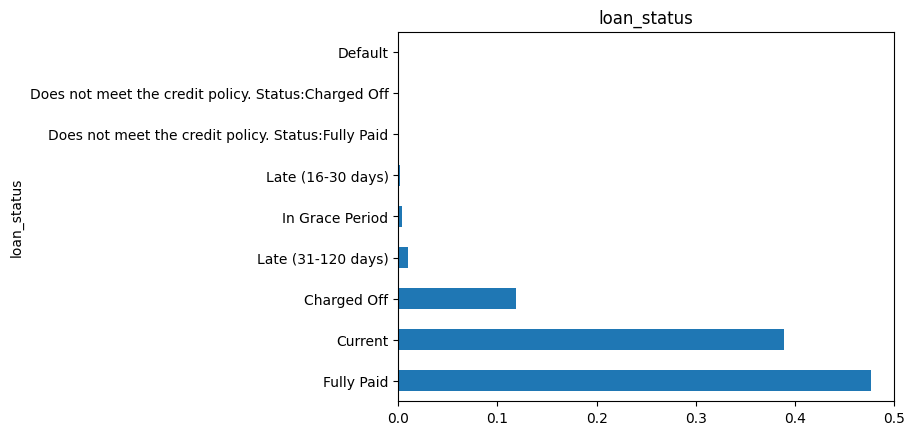

In [16]:

#loan_Status_Count = data['loan_status'].value_counts()
#loan_Status_Count.plot.barh()
barplot(data,'loan_status','barh')

Combining all the late statuses and converting the counts into percentages, we can see that ~15% of the loans are in delinquent status.

<Axes: ylabel='is_delinquent'>

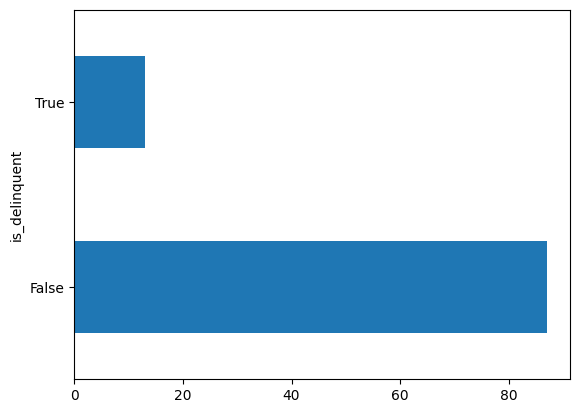

In [16]:
data['is_delinquent'] = data['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)', 'Charged Off', 'Default'])
deliq_cnt = data['is_delinquent'].value_counts(normalize=True)*100
deliq_cnt.plot.barh()

Let's see if there is any relationship between loan amount and the delinquency status. We can explore this data by plotting these variables.

With the describe function, we can see that the maximum amount of loan is 40K and minimum is 500. 75% of the loan value is less than 20K which is half of the maximum value. Let's do some additional analysis to see if higher or lower the loan amount has any correlation with the delinquency status of the loan.

In [21]:
data['loan_amnt'].describe().apply(lambda x: format(x, 'f'))

count    2260668.000000
mean       15046.931228
std         9190.245488
min          500.000000
25%         8000.000000
50%        12900.000000
75%        20000.000000
max        40000.000000
Name: loan_amnt, dtype: object

By plotting a box plot on the loan amount and delinquent status, 50% of the delinquency happens for the loan amount value 8000-21000 but we can't come to any trend with this as 50% of non-delinquent loans also has the same loan amount range. This doesn't help us in establish any concrete correlation between these two variables.
Let's try and break down the loan amount into ranges to see if there are any additional insights available on where the bulk of default happens.

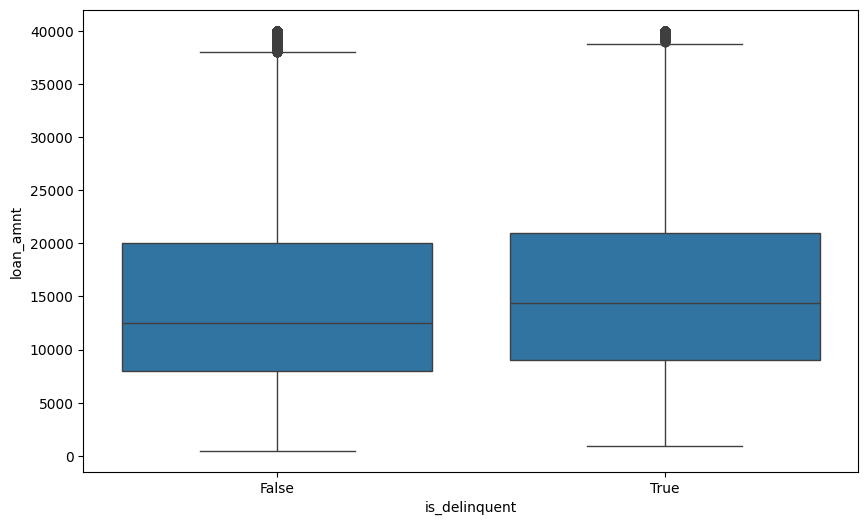

In [23]:
plt.figure(figsize=(10,6))
sns.boxplot(x='is_delinquent',y='loan_amnt',data=data)
plt.title=('Loan Amount vs Delinquency status')
plt.show()

loan_amount_range
(499.999, 6000.0]     10.553981
(6000.0, 10000.0]     11.886922
(10000.0, 12900.0]    14.223689
(12900.0, 18000.0]    14.138069
(18000.0, 25000.0]    14.472444
(25000.0, 40000.0]    13.775302
Name: is_delinquent, dtype: float64


C:\Users\tdev1nm\AppData\Local\Temp\1\ipykernel_4232\2911037673.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delinq_rate = data.groupby('loan_amount_range')['is_delinquent'].mean()*100


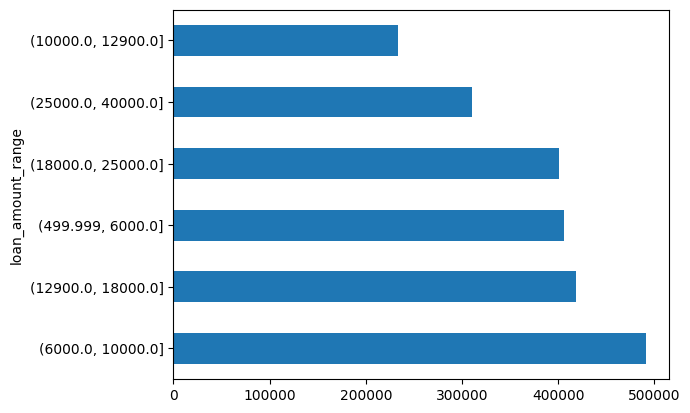

In [37]:
data['loan_amount_range'] = pd.qcut(data['loan_amnt'], q=6)
data['loan_amount_range'].value_counts().plot(kind='barh')
avg_delinq_rate = data.groupby('loan_amount_range')['is_delinquent'].mean()*100
print(avg_delinq_rate)


<Axes: ylabel='loan_amount_range'>

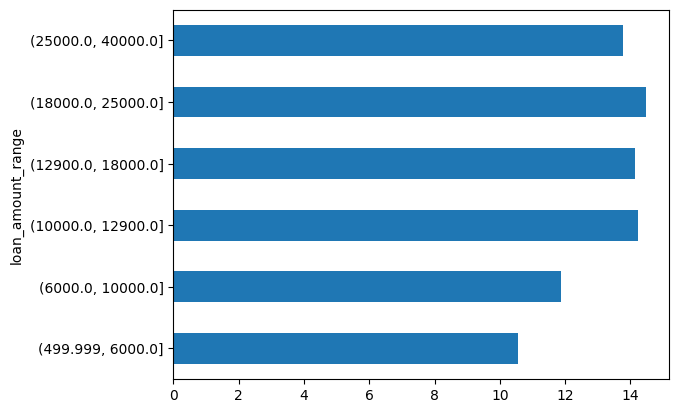

In [39]:
avg_delinq_rate.plot(kind='barh')

We could see that lower the loan amounts the delinquency risks are lower but there isn't any clear cut indication on which range of loan value got higher rate of default. I am going to switch to see if interest rates, loan terms, grade or credit score will tell us any different story.